<a href="https://colab.research.google.com/github/sharmaanj200/Clickbait-Detection-Project/blob/main/Machine_Learning_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LOADING DATASET

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mlt

In [ ]:
import json
import pandas as pd

# Specify the path to the JSON file
truth_json_file_path = '/content/sample_data/truth.jsonl'

# Load the JSON Lines file into a DataFrame
truth_df = pd.read_json(truth_json_file_path, lines=True)

In [ ]:
truth_df

,id,truthJudgments,truthMean,truthMedian,truthMode,truthClass
0,608310377143799808,"[0.0, 0.6666667, 0.0, 0.33333334000000003, 0.0]",0.200000,0.000000,0.000000,no-clickbait
1,609297109095972864,"[0.6666667, 0.0, 0.0, 0.0, 0.0]",0.133333,0.000000,0.000000,no-clickbait
2,609504474621612032,"[0.33333334000000003, 0.6666667, 1.0, 0.0, 0.6...",0.533333,0.666667,0.666667,clickbait
3,609748367049105408,"[1.0, 0.0, 0.33333334000000003, 0.333333340000...",0.466667,0.333333,0.333333,no-clickbait
4,608688782821453824,"[1.0, 0.33333334000000003, 0.6666667, 0.333333...",0.666667,0.666667,1.000000,clickbait
...,...,...,...,...,...,...
2454,609056814819323904,"[0.6666667, 0.33333334000000003, 0.0, 1.0, 1.0]",0.600000,0.666667,1.000000,clickbait
2455,610125815116865536,"[0.33333334000000003, 1.0, 0.0, 0.0, 0.0]",0.266667,0.000000,0.000000,no-clickbait
2456,608338587495628800,"[0.0, 0.33333334000000003, 0.0, 1.0, 0.6666667]",0.400000,0.333333,0.000000,no-clickbait
2457,609684420082180096,"[0.6666667, 0.0, 0.33333334000000003, 0.0, 1.0]",0.400000,0.333333,0.000000,no-clickbait


In [ ]:
import pandas as pd

# Specify the path to the JSON Lines file
instances_jsonl_file_path = '/content/sample_data/instances.jsonl'

# Load the JSON Lines file into a DataFrame
instance_df = pd.read_json(instances_jsonl_file_path, lines=True)

In [ ]:
instance_df

,id,postTimestamp,postText,postMedia,targetTitle,targetDescription,targetKeywords,targetParagraphs,targetCaptions
0,608310377143799808,Tue Jun 09 16:31:10 +0000 2015,[Apple's iOS 9 'App thinning' feature will giv...,[],Apple gives back gigabytes: iOS 9 'app thinnin...,'App thinning' will be supported on Apple's iO...,"Apple,gives,gigabytes,iOS,9,app,thinning,featu...",[Paying for a 64GB phone only to discover that...,['App thinning' will be supported on Apple's i...
1,609297109095972864,Fri Jun 12 09:52:05 +0000 2015,[RT @kenbrown12: Emerging market investors are...,[media/609297109095972864.jpg],Emerging Markets Suffer Largest Outflow in Sev...,Global investors have yanked $9.3 billion from...,"emerging market,emerging markets,em flows,em i...","[Emerging markets are out of favor., Global in...","[Stocks Fall as Investors Watch Central Banks,..."
2,609504474621612032,Fri Jun 12 23:36:05 +0000 2015,[U.S. Soccer should start answering tough ques...,[],U.S. Soccer should start answering tough quest...,A U.S. Senator's scathing letter questioned U....,,"[WINNIPEG, Manitoba – The bubble U.S. Soccer i...",[US to vote for Ali in FIFA election and not B...
3,609748367049105408,Sat Jun 13 15:45:13 +0000 2015,[How theme parks like Disney World left the mi...,[],How theme parks like Disney World left the mid...,"America's top family vacation spots, like the ...","disney, disney world, disney ticket prices, di...",[When Walt Disney World opened in an Orlando s...,"[Some 1,000 persons turned out in Albuquerque,..."
4,608688782821453824,Wed Jun 10 17:34:49 +0000 2015,[Could light bulbs hurt your health? One compa...,[media/608688782821453825.jpg],Warning labels on your light bulbs,One company will put a health notice on all th...,"health, Should there be warning labels on your...",[(CNN)The light bulb always makes the world's ...,[Electric lights have made the world safer and...
...,...,...,...,...,...,...,...,...,...
2454,609056814819323904,Thu Jun 11 17:57:15 +0000 2015,[Man who received world's first penis transpla...,[],World's first penis transplant patient is set ...,"Surgeons at Stellenbosch University, who carri...","World,s,penis,transplant,patient,set,FATHER,an...",[The man who underwent the world's first succe...,[Six months after undergoing the world's first...
2455,610125815116865536,Sun Jun 14 16:45:04 +0000 2015,"[RT @NYTSports: Abby didn't start, team couldn...",[media/610125815116865536.jpg],"At Women’s World Cup, Tie Leaves U.S. on Solid...",With Abby Wambach not starting for the first t...,"Soccer,Wambach Abby,Press Christen,United St...","[WINNIPEG, Manitoba, The moment Abby Wambach s...","[The New York Times, Basic, All Access, Home D..."
2456,608338587495628800,Tue Jun 09 18:23:16 +0000 2015,[Obama defends Affordable Care Act ahead of Su...,[media/608338587495628801.jpg],Obama Defends Health Law Ahead of Supreme Cour...,President Obama talks at the G7 summit in Germ...,,[With the Supreme Court set to issue a ruling ...,[]
2457,609684420082180096,Sat Jun 13 11:31:07 +0000 2015,[New study of the Deflategate report concludes...,[],Deflating ‘Deflategate’,A new study weakens the case against the Patri...,"Football,Cheating,American Enterprise Institut...","[BEFORE “Deflategate,” the National Football L...","[The New York Times, Basic, All Access, Home D..."


# Preprocessing

In [ ]:
def format_post_media(value):
    path = ""
    for ch in value:
      if ch != '[' and ch != ']':
        path += ch;
    return path

# Applying the function to the entire column
instance_df['postMedia'] = instance_df['postMedia'].apply(format_post_media)

In [ ]:
import numpy as np
media_folder_path = '/content/drive/MyDrive/'

def append_drive_link(image_path):
    if pd.isnull(image_path):
        return image_path
    else:
        return media_folder_path + image_path

# Apply the function to the column 'postMedia'
instance_df['postMedia'] = instance_df['postMedia'].apply(append_drive_link)

In [ ]:
instance_df.iloc[2318]['postMedia']

'/content/drive/MyDrive/media/608883901940035584.jpg'

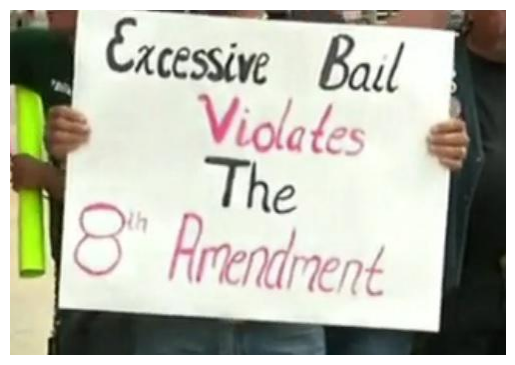

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

image_path = '/content/drive/MyDrive/media/607685125346885633.jpg'
img = Image.open(image_path)

# Display the image using Matplotlib
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.show()

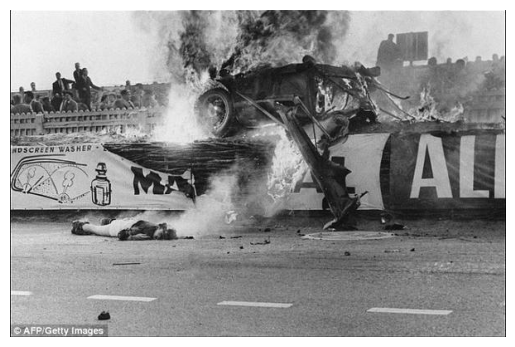

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

image_path = '/content/drive/MyDrive/media/609004486280028160.jpg'
img = Image.open(image_path)

# Display the image using Matplotlib
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.show()

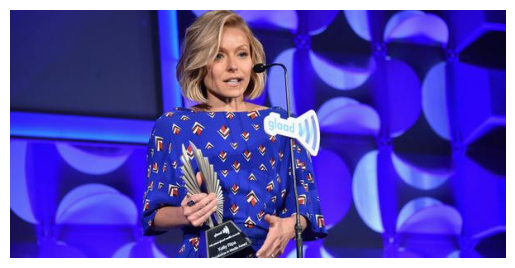

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

image_path = '/content/drive/MyDrive/media/608883901940035584.jpg'
img = Image.open(image_path)

# Display the image using Matplotlib
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.show()

In [ ]:
# merge by id
merged_df = pd.merge(instance_df, truth_df, on='id', how='inner')

In [ ]:
merged_df.drop(columns=['id', 'truthJudgments', 'truthMean', 'truthMedian', 'truthMode', 'postTimestamp'], inplace=True)

In [ ]:
merged_df

,postText,postMedia,targetTitle,targetDescription,targetKeywords,targetParagraphs,targetCaptions,truthClass
0,[Apple's iOS 9 'App thinning' feature will giv...,/content/drive/MyDrive/,Apple gives back gigabytes: iOS 9 'app thinnin...,'App thinning' will be supported on Apple's iO...,"Apple,gives,gigabytes,iOS,9,app,thinning,featu...",[Paying for a 64GB phone only to discover that...,['App thinning' will be supported on Apple's i...,no-clickbait
1,[RT @kenbrown12: Emerging market investors are...,/content/drive/MyDrive/media/60929710909597286...,Emerging Markets Suffer Largest Outflow in Sev...,Global investors have yanked $9.3 billion from...,"emerging market,emerging markets,em flows,em i...","[Emerging markets are out of favor., Global in...","[Stocks Fall as Investors Watch Central Banks,...",no-clickbait
2,[U.S. Soccer should start answering tough ques...,/content/drive/MyDrive/,U.S. Soccer should start answering tough quest...,A U.S. Senator's scathing letter questioned U....,,"[WINNIPEG, Manitoba – The bubble U.S. Soccer i...",[US to vote for Ali in FIFA election and not B...,clickbait
3,[How theme parks like Disney World left the mi...,/content/drive/MyDrive/,How theme parks like Disney World left the mid...,"America's top family vacation spots, like the ...","disney, disney world, disney ticket prices, di...",[When Walt Disney World opened in an Orlando s...,"[Some 1,000 persons turned out in Albuquerque,...",no-clickbait
4,[Could light bulbs hurt your health? One compa...,/content/drive/MyDrive/media/60868878282145382...,Warning labels on your light bulbs,One company will put a health notice on all th...,"health, Should there be warning labels on your...",[(CNN)The light bulb always makes the world's ...,[Electric lights have made the world safer and...,clickbait
...,...,...,...,...,...,...,...,...
2454,[Man who received world's first penis transpla...,/content/drive/MyDrive/,World's first penis transplant patient is set ...,"Surgeons at Stellenbosch University, who carri...","World,s,penis,transplant,patient,set,FATHER,an...",[The man who underwent the world's first succe...,[Six months after undergoing the world's first...,clickbait
2455,"[RT @NYTSports: Abby didn't start, team couldn...",/content/drive/MyDrive/media/61012581511686553...,"At Women’s World Cup, Tie Leaves U.S. on Solid...",With Abby Wambach not starting for the first t...,"Soccer,Wambach Abby,Press Christen,United St...","[WINNIPEG, Manitoba, The moment Abby Wambach s...","[The New York Times, Basic, All Access, Home D...",no-clickbait
2456,[Obama defends Affordable Care Act ahead of Su...,/content/drive/MyDrive/media/60833858749562880...,Obama Defends Health Law Ahead of Supreme Cour...,President Obama talks at the G7 summit in Germ...,,[With the Supreme Court set to issue a ruling ...,[],no-clickbait
2457,[New study of the Deflategate report concludes...,/content/drive/MyDrive/,Deflating ‘Deflategate’,A new study weakens the case against the Patri...,"Football,Cheating,American Enterprise Institut...","[BEFORE “Deflategate,” the National Football L...","[The New York Times, Basic, All Access, Home D...",no-clickbait


Step 2: Feature Engineering

Extracting relevant features based on teaser image, linguistic, and user behavior patterns

In [ ]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,918 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [ ]:
!pip install pytesseract

In [ ]:
import pytesseract

# Set the Tesseract path (change this path according to your installation)
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'

In [ ]:
import pandas as pd
import numpy as np
import pytesseract
import cv2
from sklearn.feature_extraction.text import TfidfVectorizer
from google.colab.patches import cv2_imshow


# Function to extract text from image using OCR
def extract_text_from_image(merged_df):
    texts = []
    for index, row in merged_df.iterrows():
        img = cv2.imread(row['postMedia'])
        if img is not None:
            img = cv2.resize(img, (400, 450))
            text = pytesseract.image_to_string(img)
            texts.append(text)
        else:
            texts.append('')
    return texts


image_texts = extract_text_from_image(merged_df)

# Add image_texts as a new column in merged_df
merged_df['image_text'] = image_texts

In [ ]:
merged_df

,postText,postMedia,targetTitle,targetDescription,targetKeywords,targetParagraphs,targetCaptions,truthClass,image_text
0,[Apple's iOS 9 'App thinning' feature will giv...,/content/drive/MyDrive/,Apple gives back gigabytes: iOS 9 'app thinnin...,'App thinning' will be supported on Apple's iO...,"Apple,gives,gigabytes,iOS,9,app,thinning,featu...",[Paying for a 64GB phone only to discover that...,['App thinning' will be supported on Apple's i...,no-clickbait,
1,[RT @kenbrown12: Emerging market investors are...,/content/drive/MyDrive/media/60929710909597286...,Emerging Markets Suffer Largest Outflow in Sev...,Global investors have yanked $9.3 billion from...,"emerging market,emerging markets,em flows,em i...","[Emerging markets are out of favor., Global in...","[Stocks Fall as Investors Watch Central Banks,...",no-clickbait,Rushing Out\n\nEmerging markets have suffered ...
2,[U.S. Soccer should start answering tough ques...,/content/drive/MyDrive/,U.S. Soccer should start answering tough quest...,A U.S. Senator's scathing letter questioned U....,,"[WINNIPEG, Manitoba – The bubble U.S. Soccer i...",[US to vote for Ali in FIFA election and not B...,clickbait,
3,[How theme parks like Disney World left the mi...,/content/drive/MyDrive/,How theme parks like Disney World left the mid...,"America's top family vacation spots, like the ...","disney, disney world, disney ticket prices, di...",[When Walt Disney World opened in an Orlando s...,"[Some 1,000 persons turned out in Albuquerque,...",no-clickbait,
4,[Could light bulbs hurt your health? One compa...,/content/drive/MyDrive/media/60868878282145382...,Warning labels on your light bulbs,One company will put a health notice on all th...,"health, Should there be warning labels on your...",[(CNN)The light bulb always makes the world's ...,[Electric lights have made the world safer and...,clickbait,
...,...,...,...,...,...,...,...,...,...
2454,[Man who received world's first penis transpla...,/content/drive/MyDrive/,World's first penis transplant patient is set ...,"Surgeons at Stellenbosch University, who carri...","World,s,penis,transplant,patient,set,FATHER,an...",[The man who underwent the world's first succe...,[Six months after undergoing the world's first...,clickbait,
2455,"[RT @NYTSports: Abby didn't start, team couldn...",/content/drive/MyDrive/media/61012581511686553...,"At Women’s World Cup, Tie Leaves U.S. on Solid...",With Abby Wambach not starting for the first t...,"Soccer,Wambach Abby,Press Christen,United St...","[WINNIPEG, Manitoba, The moment Abby Wambach s...","[The New York Times, Basic, All Access, Home D...",no-clickbait,\n
2456,[Obama defends Affordable Care Act ahead of Su...,/content/drive/MyDrive/media/60833858749562880...,Obama Defends Health Law Ahead of Supreme Cour...,President Obama talks at the G7 summit in Germ...,,[With the Supreme Court set to issue a ruling ...,[],no-clickbait,\n
2457,[New study of the Deflategate report concludes...,/content/drive/MyDrive/,Deflating ‘Deflategate’,A new study weakens the case against the Patri...,"Football,Cheating,American Enterprise Institut...","[BEFORE “Deflategate,” the National Football L...","[The New York Times, Basic, All Access, Home D...",no-clickbait,


In [ ]:
# Save merged_df to a CSV file
merged_df.to_csv('merged_df.csv', index=False)

# TF-IDF

In [113]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Function to calculate TF-IDF similarity for each row
# Function to calculate TF-IDF similarity for each row
def calculate_similarity(row):
    # Convert list of texts to single strings
    postText_str = ' '.join(row['postText'])
    targetTitle_str = ' '.join(row['targetTitle'])
    targetDescription_str = ' '.join(row['targetDescription'])
    targetKeywords_str = ' '.join(row['targetKeywords'])
    targetParagraphs_str = ' '.join(row['targetParagraphs'])
    targetCaptions_str = ' '.join(row['targetCaptions'])

    # Calculate TF-IDF for each text
    postText_tfidf = tfidf_vectorizer.fit_transform([postText_str])
    targetTitle_tfidf = tfidf_vectorizer.transform([targetTitle_str])
    targetDescription_tfidf = tfidf_vectorizer.transform([targetDescription_str])
    targetKeywords_tfidf = tfidf_vectorizer.transform([targetKeywords_str])
    targetParagraphs_tfidf = tfidf_vectorizer.transform([targetParagraphs_str])
    targetCaptions_tfidf = tfidf_vectorizer.transform([targetCaptions_str])

    # Calculate TF-IDF similarities
    targetTitle_similarity_tfidf = cosine_similarity(postText_tfidf, targetTitle_tfidf)[0][0]
    targetDescription_similarity_tfidf = cosine_similarity(postText_tfidf, targetDescription_tfidf)[0][0]
    targetKeywords_similarity_tfidf = cosine_similarity(postText_tfidf, targetKeywords_tfidf)[0][0]
    targetParagraphs_similarity_tfidf = cosine_similarity(postText_tfidf, targetParagraphs_tfidf)[0][0]
    targetCaptions_similarity_tfidf = cosine_similarity(postText_tfidf, targetCaptions_tfidf)[0][0]

    # Determine image feature
    image_feature = 1 if row['image_text'] and row['image_text'].strip() else 0

    # Map truthClass to 0 if 'clickbait', else 1
    truthClass_mapped = 0 if row['truthClass'] == 'clickbait' else 1

    return {
        'targetTitle_similarity_tfidf': targetTitle_similarity_tfidf,
        'targetDescription_similarity_tfidf': targetDescription_similarity_tfidf,
        'targetKeywords_similarity_tfidf': targetKeywords_similarity_tfidf,
        'targetParagraphs_similarity_tfidf': targetParagraphs_similarity_tfidf,
        'targetCaptions_similarity_tfidf': targetCaptions_similarity_tfidf,
        'image_feature': image_feature,
        'truthClass_mapped': truthClass_mapped
    }

feature1 = merged_df.apply(calculate_similarity, axis=1, result_type='expand')

In [114]:
feature1

,targetTitle_similarity_tfidf,targetDescription_similarity_tfidf,targetKeywords_similarity_tfidf,targetParagraphs_similarity_tfidf,targetCaptions_similarity_tfidf,image_feature,truthClass_mapped
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2454,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2455,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2456,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2457,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# MODEL TRAINING

In [127]:
# Step 3: Data Preprocessing
# Encode categorical variables, handle missing values, and split data into train/test sets
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Handle missing values using SimpleImputer
# Impute missing values with the mean of the column
imputer = SimpleImputer(strategy='mean')
final_features_imputed = imputer.fit_transform(feature1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(final_features_imputed, feature1['truthClass_mapped'], test_size=0.2, random_state=42)

# Display the shapes of the training and testing data
print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}, y_test shape: {y_test.shape}')

X_train shape: (1967, 7), y_train shape: (1967,)
X_test shape: (492, 7), y_test shape: (492,)


In [111]:
# Step 4: Model Training
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define X and y
X = feature1[['targetTitle_similarity_tfidf', 'targetDescription_similarity_tfidf', 'targetKeywords_similarity_tfidf', 'targetParagraphs_similarity_tfidf', 'targetCaptions_similarity_tfidf', 'image_feature']]
y = feature1['truthClass_mapped']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate XGBoost classifier
model = xgb.XGBClassifier()

# Train the model
model.fit(X_train, y_train)

# Step 5: Model Evaluation
# Predict on the test set
y_pred = model.predict(X_test)

# Generate clickbait scores
clickbait_scores = model.predict_proba(X_test)[:, 1]

In [112]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error

# Calculate additional evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, clickbait_scores)
mse = mean_squared_error(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')
print(f'Mean Squared Error: {mse}')

Accuracy: 0.6443089430894309
Precision: 0.7
Recall: 0.8466076696165191
F1 Score: 0.7663551401869159
ROC AUC Score: 0.5735727919486379
Mean Squared Error: 0.3556910569105691


In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

# Define X and y for RandomForestClassifier using the same features as XGBoost
X_rf = feature1[['targetTitle_similarity_tfidf', 'targetDescription_similarity_tfidf', 'targetKeywords_similarity_tfidf', 'targetParagraphs_similarity_tfidf', 'targetCaptions_similarity_tfidf', 'image_feature']]
y_rf = feature1['truthClass_mapped']

# Split data into train and test sets for RandomForestClassifier
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

# Instantiate RandomForestClassifier
rf_model = RandomForestClassifier()

# Train the RandomForestClassifier model
rf_model.fit(X_train_rf, y_train_rf)

# Predict on the test set using RandomForestClassifier
y_pred_rf = rf_model.predict(X_test_rf)
rf_clickbait_scores = rf_model.predict_proba(X_test_rf)[:, 1]

# Evaluate the performance of RandomForestClassifier
rf_accuracy = accuracy_score(y_test_rf, y_pred_rf)
rf_precision = precision_score(y_test_rf, y_pred_rf)
rf_recall = recall_score(y_test_rf, y_pred_rf)
rf_f1 = f1_score(y_test_rf, y_pred_rf)
rf_roc_auc = roc_auc_score(y_test_rf, rf_clickbait_scores)
rf_mse = mean_squared_error(y_test_rf, y_pred_rf)

# Print the evaluation metrics for RandomForestClassifier
print("Random Forest Classifier Metrics:")
print(f'Accuracy: {rf_accuracy}')
print(f'Precision: {rf_precision}')
print(f'Recall: {rf_recall}')
print(f'F1 Score: {rf_f1}')
print(f'ROC AUC Score: {rf_roc_auc}')
print(f'Mean Squared Error: {rf_mse}')


Random Forest Classifier Metrics:
Accuracy: 0.6890243902439024
Precision: 0.6890243902439024
Recall: 1.0
F1 Score: 0.815884476534296
ROC AUC Score: 0.5068251489386315
Mean Squared Error: 0.31097560975609756


# Word Embeddings (Word2Vec)

In [ ]:
import pandas as pd
import gensim.downloader as api
from gensim.models import Word2Vec

# Load the Word2Vec model
word2vec_model = api.load("word2vec-google-news-300")

In [120]:
def calculate_wordembed_similarity(row):
    # Check if any of the lists are empty
    if not row['postText'] or not row['targetTitle'] or not row['targetDescription'] or not row['targetKeywords'] or not row['targetParagraphs'] or not row['targetCaptions']:
        # Return NaN or any other value indicating missing data
        return {'targetTitle_wordembed_similarity': None,
                'targetDescription_wordembed_similarity': None,
                'targetKeywords_wordembed_similarity': None,
                'targetParagraphs_wordembed_similarity': None,
                'targetCaptions_wordembed_similarity': None,
                'articleDescription_wordembed_similarity': None,
                'image_feature': 0,
                'truthClass_mapped': 0}

    targetTitle_wordembed_similarity = word2vec_model.n_similarity(row['postText'], row['targetTitle'])
    targetDescription_wordembed_similarity = word2vec_model.n_similarity(row['postText'], row['targetDescription'])
    targetKeywords_wordembed_similarity = word2vec_model.n_similarity(row['postText'], row['targetKeywords'])
    targetParagraphs_wordembed_similarity = word2vec_model.n_similarity(row['postText'], row['targetParagraphs'])
    targetCaptions_wordembed_similarity = word2vec_model.n_similarity(row['postText'], row['targetCaptions'])
    articleDescription_wordembed_similarity = word2vec_model.n_similarity(row['targetTitle'], row['targetDescription'])

    # Determine image feature
    image_feature = 1 if row['image_text'] and row['image_text'].strip() else 0

    # Map truthClass to 0 if 'clickbait', else 1
    truthClass_mapped = 0 if row['truthClass'] == 'clickbait' else 1

    return {
        'targetTitle_wordembed_similarity': targetTitle_wordembed_similarity,
        'targetDescription_wordembed_similarity': targetDescription_wordembed_similarity,
        'targetKeywords_wordembed_similarity': targetKeywords_wordembed_similarity,
        'targetParagraphs_wordembed_similarity': targetParagraphs_wordembed_similarity,
        'targetCaptions_wordembed_similarity': targetCaptions_wordembed_similarity,
        'articleDescription_wordembed_similarity': articleDescription_wordembed_similarity,
        'image_feature': image_feature,
        'truthClass_mapped': truthClass_mapped
    }



# Apply the function to each row of merged_df to create feature2 DataFrame
feature2 = merged_df.apply(calculate_wordembed_similarity, axis=1, result_type='expand')

In [122]:
# Display the first few rows of feature2
feature2

,targetTitle_wordembed_similarity,targetDescription_wordembed_similarity,targetKeywords_wordembed_similarity,targetParagraphs_wordembed_similarity,targetCaptions_wordembed_similarity,articleDescription_wordembed_similarity,image_feature,truthClass_mapped
0,0.0,0.0,0.0,0.0,0.0,0.991755,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.966567,1.0,1.0
2,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.985582,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.972137,0.0,0.0
...,...,...,...,...,...,...,...,...
2454,0.0,0.0,0.0,0.0,0.0,0.990910,0.0,0.0
2455,0.0,0.0,0.0,0.0,0.0,0.960675,0.0,1.0
2456,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2457,0.0,0.0,0.0,0.0,0.0,0.949167,0.0,1.0


In [139]:
# Step 3: Data Preprocessing
# Encode categorical variables, handle missing values, and split data into train/test sets
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Handle missing values using SimpleImputer
# Impute missing values with the mean of the column
imputer = SimpleImputer(strategy='mean')
final_features_imputed = imputer.fit_transform(feature1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(final_features_imputed, feature2['truthClass_mapped'], test_size=0.2, random_state=42)

# Display the shapes of the training and testing data
print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}, y_test shape: {y_test.shape}')

X_train shape: (1967, 7), y_train shape: (1967,)
X_test shape: (492, 7), y_test shape: (492,)


In [140]:
# Step 4: Model Training
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define X and y
X = feature2[['targetTitle_wordembed_similarity', 'targetDescription_wordembed_similarity', 'targetKeywords_wordembed_similarity', 'targetParagraphs_wordembed_similarity', 'targetCaptions_wordembed_similarity', 'articleDescription_wordembed_similarity', 'image_feature']]
y = feature2['truthClass_mapped']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate XGBoost classifier
model = xgb.XGBClassifier()

# Train the model
model.fit(X_train, y_train)

# Step 5: Model Evaluation
# Predict on the test set
y_pred = model.predict(X_test)

# Generate clickbait scores
clickbait_scores = model.predict_proba(X_test)[:, 1]

In [126]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error

# Calculate additional evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, clickbait_scores)
mse = mean_squared_error(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')
print(f'Mean Squared Error: {mse}')

Accuracy: 0.8333333333333334
Precision: 0.726457399103139
Recall: 0.8852459016393442
F1 Score: 0.7980295566502462
ROC AUC Score: 0.8939554706704158
Mean Squared Error: 0.16666666666666666


In [142]:
# Here Random forest did not work because of the presence of NAN values